In [48]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
## Collect the data
data = pd.read_csv("datasets/housing.csv")

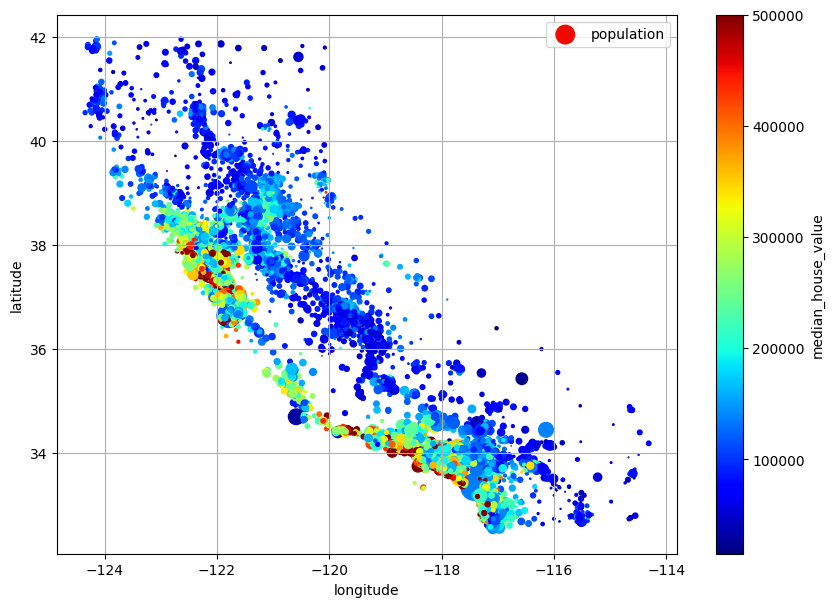

In [50]:
## Visulize density of population and house_value in their zone
data.plot(kind='scatter',x = 'longitude',y='latitude',grid=True,s=data['population']/100,label='population',c='median_house_value',cmap='jet',colorbar='True',legend=True,sharex=False,figsize=(10,7))
plt.show()


<Axes: xlabel='median_income', ylabel='median_house_value'>

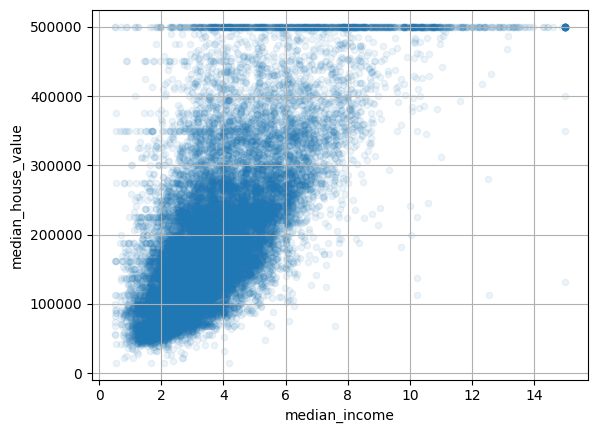

In [51]:
## Median_income visulize
data.plot(kind='scatter',x='median_income',y='median_house_value',alpha=0.08,grid=True)

In [52]:
## Remove non-numerical data but best method is replace them with co-related data with (OrdinalEncoder in scikit-learn)
data.drop('ocean_proximity',axis=1,inplace=True)

In [53]:
## Manage some data for more efficiency
data['room_per_house'] = data['total_rooms']/data['households']
data['bedroom_ratio'] = data['total_bedrooms']/data['total_rooms']

## Corelation between House value and other perameters
corr_matrix = data.corr()
corr_matrix['median_house_value'].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688075
room_per_house        0.151948
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049686
population           -0.024650
longitude            -0.045967
latitude             -0.144160
bedroom_ratio        -0.255880
Name: median_house_value, dtype: float64

array([[<Axes: xlabel='median_house_value', ylabel='median_house_value'>,
        <Axes: xlabel='median_income', ylabel='median_house_value'>,
        <Axes: xlabel='total_rooms', ylabel='median_house_value'>,
        <Axes: xlabel='housing_median_age', ylabel='median_house_value'>],
       [<Axes: xlabel='median_house_value', ylabel='median_income'>,
        <Axes: xlabel='median_income', ylabel='median_income'>,
        <Axes: xlabel='total_rooms', ylabel='median_income'>,
        <Axes: xlabel='housing_median_age', ylabel='median_income'>],
       [<Axes: xlabel='median_house_value', ylabel='total_rooms'>,
        <Axes: xlabel='median_income', ylabel='total_rooms'>,
        <Axes: xlabel='total_rooms', ylabel='total_rooms'>,
        <Axes: xlabel='housing_median_age', ylabel='total_rooms'>],
       [<Axes: xlabel='median_house_value', ylabel='housing_median_age'>,
        <Axes: xlabel='median_income', ylabel='housing_median_age'>,
        <Axes: xlabel='total_rooms', ylabel='housi

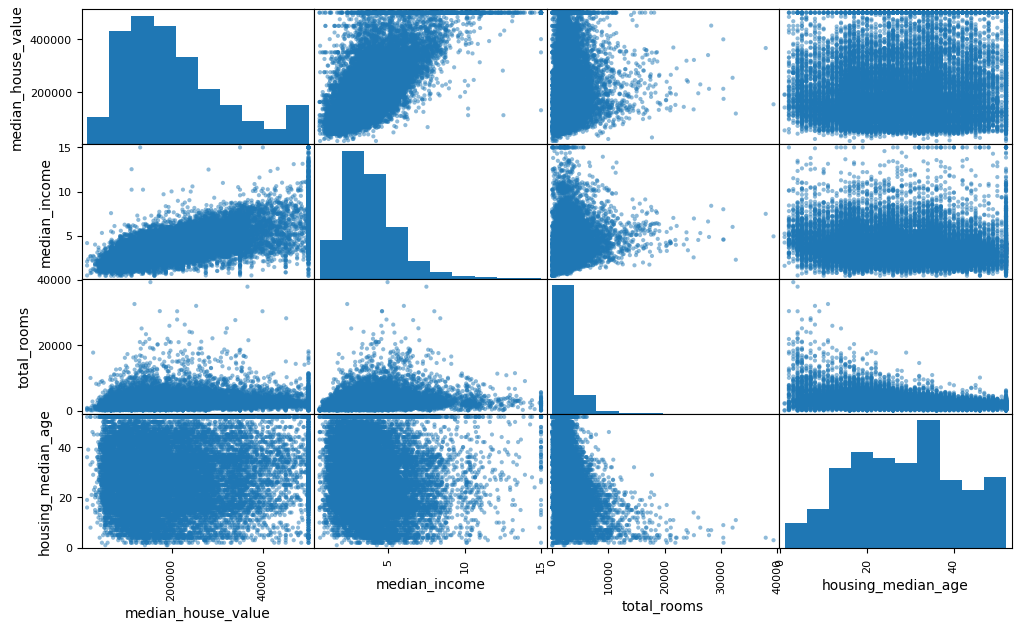

In [54]:
## Visulize some important co-related data
pd.plotting.scatter_matrix(data[['median_house_value','median_income','total_rooms','housing_median_age',]],figsize=(12,7))

In [ ]:
## Make a pipeline for my model
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
                        ## Fixing emty or NaN data in main data set
my_pipeline = Pipeline([('simImputer',SimpleImputer(strategy='median')),
                        ## Scaling all features to the same scale for better model training
                        ('std_scaler',StandardScaler())])

In [ ]:
## Fiting the data in my pipeline
fitted_data = my_pipeline.fit_transform(data)

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>],
       [<Axes: title={'center': 'room_per_house'}>,
        <Axes: title={'center': 'bedroom_ratio'}>, <Axes: >]],
      dtype=object)

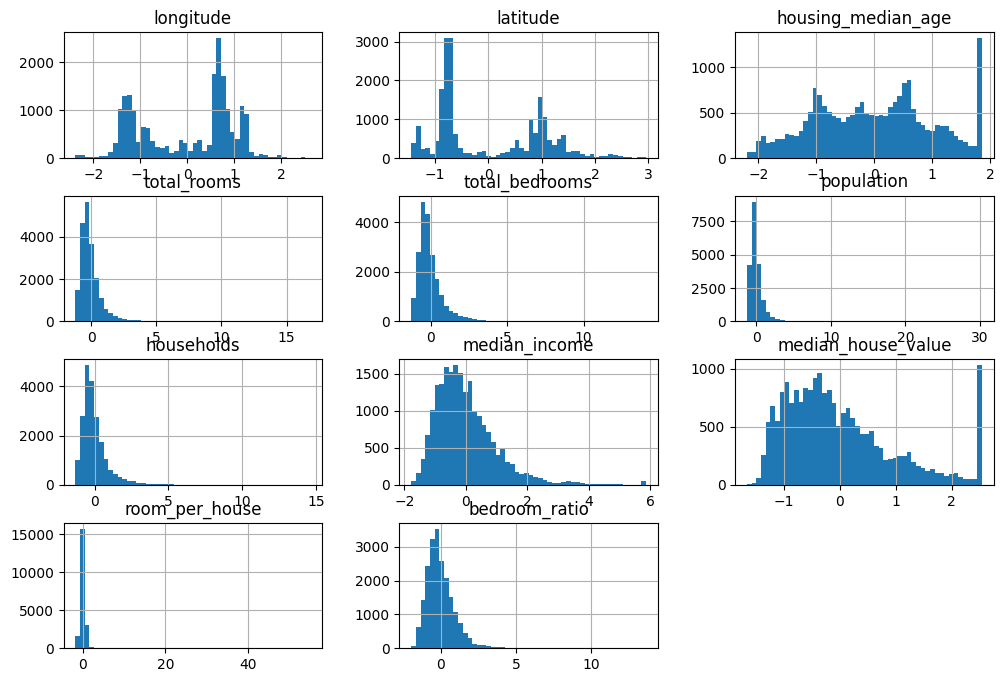

In [58]:
## Visualization
a = pd.DataFrame(fitted_data,columns=data.columns)
a.hist(bins=50,figsize=(12,8))